# Data collection

First we download the movie genre dataset via the Kaggle API. In order to do this you have to create an API Token and place the kaggle.json in the following location: ~./.kaggle/kaggle.json. If you haven't used the Kaggle API before, please refer to this video: https://www.youtube.com/watch?v=DgGFhQmfxHo&ab_channel=JamesBriggs. 


You can also download the dataset manually: https://www.kaggle.com/datasets/aakashsaroop/movie-genreplotposter and then place it in the same directory as this notebook.

In [2]:
import kaggle
!kaggle datasets download aakashsaroop/movie-genreplotposter

 68%|██████████████████████████▍            | 10.0M/14.7M [00:00<00:00, 101MB/s]
100%|██████████████████████████████████████| 14.7M/14.7M [00:00<00:00, 52.6MB/s]


In [3]:
!unzip movie-genreplotposter.zip

Archive:  movie-genreplotposter.zip
  inflating: Movie_combined.csv      


# Data pre-processing

In [4]:
import pandas as pd

In [5]:
movie_df = pd.read_csv("Movie_combined.csv", index_col=0)

In [6]:
movie_df

,Title,Genre,Plot,Poster
0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...
...,...,...,...,...
21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...


In [7]:
movie_df = movie_df[["Title","Genre","Plot"]]
movie_df

,Title,Genre,Plot
0,the great train robbery,action,The film opens with two bandits breaking into ...
1,the suburbanite,comedy,The film is about a family who move to the sub...
2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...
5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...
6,the black viper,drama,A thug accosts a girl as she leaves her workpl...
...,...,...,...
21223,selam,drama,The film opens with a Senegalese boy named Kha...
21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he..."
21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the..."
21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i..."


In [8]:
from collections import Counter

In [9]:
Counter(movie_df["Title"]).most_common()

[('prey', 9),
 ('i love you', 9),
 ('paradox', 7),
 ('love', 6),
 ('ride', 6),
 ('zero', 6),
 ('sanctuary', 5),
 ('the end', 5),
 ('the village', 5),
 ('the box', 5),
 ('lucky', 5),
 ('retribution', 5),
 ('euphoria', 5),
 ('forever', 4),
 ('the valiant', 4),
 ('summertime', 4),
 ('sleeping beauty', 4),
 ('limbo', 4),
 ('bloodline', 4),
 ('lovesick', 4),
 ('angel', 4),
 ('anna', 4),
 ('teenage mutant ninja turtles', 4),
 ('rush', 4),
 ('drive', 4),
 ('hush', 4),
 ('awake', 4),
 ('doubt', 4),
 ('sherlock holmes', 4),
 ('beneath', 4),
 ('erased', 4),
 ('the guest', 4),
 ('the forest', 4),
 ('time after time', 4),
 ('rogue', 4),
 ('undercover', 4),
 ('the importance of being earnest', 4),
 ('the trap', 4),
 ('bad blood', 4),
 ('desire', 4),
 ('drifters', 4),
 ('blue', 4),
 ('chase', 4),
 ('orange', 4),
 ('shadow', 4),
 ('the escape', 3),
 ('romance', 3),
 ('i do', 3),
 ('the river', 3),
 ('grand hotel', 3),
 ("dante's inferno", 3),
 ('boy meets girl', 3),
 ('hostages', 3),
 ('dream girl', 

In [10]:
Counter(movie_df["Plot"].apply(lambda x: x[:50])).most_common()

[('At night, a carnivorous, shape-shifting alien name', 9),
 ('When Hong Kong police negotiator Lee Chung-chi (Lo', 7),
 ('New York City film school graduate Leta Evans (De ', 6),
 ('A writer fakes his own death and establishes a new', 6),
 ('In 1928, in the county of Yoknapatawpha, Mississip', 5),
 ('Wendell "Sonny" Lawson (Reynolds), an unscrupulous', 5),
 ('Residents of the small, isolated Pennsylvania vill', 5),
 ('In December 1976, financially-strapped couple Arth', 5),
 ('The storyline is light-hearted and revolves around', 5),
 ('Yoshioka, an experienced detective, investigates t', 5),
 ('The story unfolds in the Eurasian Steppes. Vera li', 5),
 ('Peter Ibbetson (Reid) is an orphan raised by his u', 4),
 ('The story focuses on Jane Hudson (Katharine Hepbur', 4),
 ('After many childless years, King Stefan and Queen ', 4),
 ('Three women in Florida have husbands serving in Vi', 4),
 ('Sam Roffe, President of Roffe & Sons Pharmaceutica', 4),
 ('Psychoanalyst Saul Benjamin takes on 

In [11]:
movie_df[movie_df["Plot"].str.contains("At night, a carnivorous")]

,Title,Genre,Plot
15637,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15638,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15639,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15640,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15641,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15642,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15643,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15644,prey,action,"At night, a carnivorous, shape-shifting alien ..."
15645,prey,action,"At night, a carnivorous, shape-shifting alien ..."


In [12]:
print("Rows before: {}".format(movie_df.shape[0]))
movie_df = movie_df.drop_duplicates(subset=['Plot'])
print("Rows after: {}".format(movie_df.shape[0]))

Rows before: 17303
Rows after: 16584


In [13]:
movie_df[movie_df["Plot"].str.contains("At night, a carnivorous")]

,Title,Genre,Plot
15637,prey,action,"At night, a carnivorous, shape-shifting alien ..."


In [14]:
Counter(movie_df["Title"]).most_common()

[('angel', 4),
 ('romance', 3),
 ('godzilla', 3),
 ('darling', 3),
 ('i love you', 3),
 ('love', 2),
 ('the valiant', 2),
 ('welcome home', 2),
 ('oh, what a night', 2),
 ('i, the jury', 2),
 ('another time, another place', 2),
 ('tarzan, the ape man', 2),
 ('see no evil', 2),
 ('the karate kid', 2),
 ('mother', 2),
 ('war', 2),
 ('london', 2),
 ('the importance of being earnest', 2),
 ('the great train robbery', 1),
 ('the suburbanite', 1),
 ('how brown saw the baseball game', 1),
 ('the adventures of dollie', 1),
 ('the black viper', 1),
 ('a calamitous elopement', 1),
 ('the fight for freedom', 1),
 ('at the altar', 1),
 ("a drunkard's reformation", 1),
 ('the golden louis', 1),
 ('an arcadian maid', 1),
 ('hemlock hoax, the detective', 1),
 ('the house with closed shutters', 1),
 ('a lad from old ireland', 1),
 ('the black arrow: a tale of the two roses', 1),
 ('brown of harvard', 1),
 ('sweet memories', 1),
 ('the musketeers of pig alley', 1),
 ('petticoat camp', 1),
 ('put yourse

In [15]:
movie_df[movie_df["Title"] == "godzilla"]

,Title,Genre,Plot
10485,godzilla,action,"In the 1960s, a marine iguana nest is exposed ..."
13045,godzilla,action,"In 1954, Godzilla, an ancient alpha predator, ..."
20496,godzilla,action,When the Japanese freighter Eiko-maru is destr...


In [16]:
movie_df = movie_df[["Title", "Plot", "Genre"]]
movie_df.columns = ["title", "text", "label_name"]
movie_df

,title,text,label_name
0,the great train robbery,The film opens with two bandits breaking into ...,action
1,the suburbanite,The film is about a family who move to the sub...,comedy
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy
5,the adventures of dollie,On a beautiful summer day a father and mother ...,drama
6,the black viper,A thug accosts a girl as she leaves her workpl...,drama
...,...,...,...
21223,selam,The film opens with a Senegalese boy named Kha...,drama
21224,particle (film),"Zeynep lost her job at weaving factory, and he...",drama
21225,çalgı çengi i̇kimiz,"Two musicians, Salih and Gürkan, described the...",comedy
21226,olanlar oldu,"Zafer, a sailor living with his mother Döndü i...",comedy


In [17]:
Counter(movie_df["label_name"]).most_common()

[('drama', 5579),
 ('comedy', 4160),
 ('action', 3463),
 ('thriller', 1925),
 ('romance', 884),
 ('animation', 573)]

In [18]:
labels = list(set(movie_df["label_name"]))
labels

['thriller', 'animation', 'action', 'romance', 'comedy', 'drama']

In [19]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'thriller': 0,
 'animation': 1,
 'action': 2,
 'romance': 3,
 'comedy': 4,
 'drama': 5}

In [20]:
movie_df["label"] = movie_df["label_name"].apply(lambda x: label2id[x])
movie_df

,title,text,label_name,label
0,the great train robbery,The film opens with two bandits breaking into ...,action,2
1,the suburbanite,The film is about a family who move to the sub...,comedy,4
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy,4
5,the adventures of dollie,On a beautiful summer day a father and mother ...,drama,5
6,the black viper,A thug accosts a girl as she leaves her workpl...,drama,5
...,...,...,...,...
21223,selam,The film opens with a Senegalese boy named Kha...,drama,5
21224,particle (film),"Zeynep lost her job at weaving factory, and he...",drama,5
21225,çalgı çengi i̇kimiz,"Two musicians, Salih and Gürkan, described the...",comedy,4
21226,olanlar oldu,"Zafer, a sailor living with his mother Döndü i...",comedy,4


# Creating train, dev, test split

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_tmp = train_test_split(
        movie_df,stratify=movie_df["label"], test_size=0.2)

df_val, df_test = train_test_split(
        df_tmp,stratify=df_tmp["label"], test_size=0.5)

In [22]:
from datasets import Features, ClassLabel, Value, Dataset, DatasetDict

ds_features = Features({"text": Value("string"), "label": ClassLabel(names=labels)})

dataset = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True),features=ds_features),
    "valid": Dataset.from_pandas(df_val.reset_index(drop=True),features=ds_features),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True),features=ds_features)})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13267
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1658
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1659
    })
})

# Count Baseline

To start off with train a simple count baseline, to see how well we perform if we only look at the words of the training dataset.

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords_en = stopwords.words("english")
stopwords_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from nltk.tokenize import word_tokenize

word_tokenize("This is just a test.")

['This', 'is', 'just', 'a', 'test', '.']

In [26]:
most_common_words = {}

for l in labels:
    tokenized_text = df_train[df_train["label_name"] == l]["text"].str.lower().apply(
        lambda x: [e for e in word_tokenize(x) if e not in stopwords_en and len(e) > 2]
    )
    
    most_common_words[l] = Counter(tokenized_text.explode()).most_common()

In [27]:
for k,v in most_common_words.items():
    print(k,"\n",v[:15])
    print("="*120)

thriller 
 [('one', 1684), ('house', 1640), ('back', 1357), ('finds', 1312), ('police', 1259), ('tells', 1246), ('find', 1156), ('two', 1130), ('killed', 1120), ('later', 1119), ('man', 1105), ('death', 1061), ('home', 1051), ('goes', 977), ('car', 969)]
animation 
 [('tom', 1404), ('jerry', 991), ('bugs', 856), ('back', 701), ('one', 458), ('however', 390), ('time', 368), ('two', 360), ('away', 348), ('find', 347), ('tries', 320), ('cat', 305), ('tells', 305), ('takes', 286), ('new', 286)]
action 
 [('one', 2508), ('back', 1976), ('men', 1878), ('two', 1722), ('killed', 1656), ('father', 1577), ('man', 1474), ('tells', 1433), ('kill', 1421), ('later', 1397), ('police', 1383), ('also', 1361), ('find', 1323), ('time', 1256), ('new', 1240)]
romance 
 [('love', 1191), ('father', 710), ('one', 497), ('family', 483), ('get', 456), ('tells', 439), ('life', 435), ('day', 417), ('back', 408), ('time', 392), ('gets', 386), ('mother', 378), ('marriage', 369), ('comes', 359), ('friend', 357)]
com

In [28]:
most_common_words_10k = {}
for k,v in most_common_words.items():
    most_common_words_10k[k] = [word for word,count in v][:10000]
    
most_common_words_10k["romance"][:3], len(most_common_words_10k["romance"])

(['love', 'father', 'one'], 10000)

In [29]:
idx = 3
df_val.iloc[idx]

title                                                    raksha
text          Rajeev (Jagapati Babu) owner of Raksha Constru...
label_name                                             thriller
label                                                         0
Name: 20164, dtype: object

In [30]:
for genre, words in most_common_words_10k.items():
    print(genre)
    print(len(list(set(word_tokenize(df_val.iloc[idx].text)) & set(words))))
    print("="*10)

thriller
90
animation
88
action
87
romance
89
comedy
88
drama
89


In [31]:
import numpy as np
from random import randint

def count_classifier(row):
    len_intersection = []
    
    for l in labels:
        len_intersection.append(len(list(set(word_tokenize(row)) & set(most_common_words_10k[l]))))

    winner = list(np.argwhere(len_intersection == np.amax(len_intersection)).flatten())
    
    if len(winner) == 1:
        pred = winner[0]
    else:
        pred = winner[randint(0,len(winner)-1)]
    
    return pred

In [32]:
df_val["count_clf_pred"] = df_val["text"].apply(count_classifier)
df_val

,title,text,label_name,label,count_clf_pred
18779,maleyali jotheyali,Preetham is the only son of a wealthy but supe...,romance,3,4
2976,ding dong williams,Hollywood's Sunrise Studios is producing a fil...,comedy,4,4
3335,on our merry way,Oliver Pease (Burgess Meredith) has deceived h...,comedy,4,4
20164,raksha,Rajeev (Jagapati Babu) owner of Raksha Constru...,thriller,0,0
10935,amy's orgasm,Amy is a single 29 year old Jewish woman. She ...,comedy,4,4
...,...,...,...,...,...
892,annabelle's affairs,After they are separated shortly after their m...,comedy,4,2
7374,honky tonk freeway,"In a small Florida tourist town named Ticlaw, ...",comedy,4,4
19757,sawaari,The film starts with a murder mystery. The mai...,thriller,0,4
15511,dracula ad 1972,"A century later, a new generation of Britons a...",thriller,0,0


In [33]:
# From here: https://github.com/nlp-with-transformers/notebooks/blob/main/02_classification.ipynb

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [34]:
print(classification_report(list(df_val["label"]),df_val["count_clf_pred"], target_names=labels))

              precision    recall  f1-score   support

    thriller       0.44      0.60      0.51       192
   animation       0.40      0.60      0.48        57
      action       0.59      0.53      0.56       346
     romance       0.23      0.31      0.27        89
      comedy       0.49      0.51      0.50       416
       drama       0.52      0.42      0.46       558

    accuracy                           0.49      1658
   macro avg       0.45      0.49      0.46      1658
weighted avg       0.50      0.49      0.49      1658



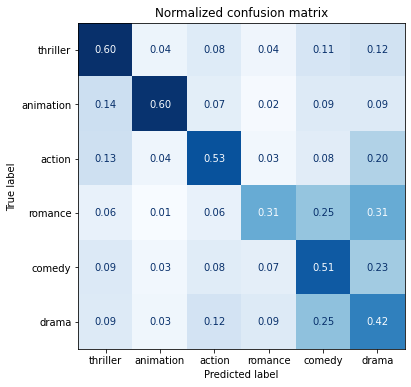

In [35]:
plot_confusion_matrix(df_val["count_clf_pred"], list(df_val["label"]), labels)

# Transformer Model

Now we are training a more complex model, namely one based on the Transformer archicture. Some the code is based on the excellent NLP with Transformers book, in particular chapter 2: https://github.com/nlp-with-transformers/notebooks/blob/main/02_classification.ipynb.

In [36]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [37]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [38]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [39]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [40]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [41]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(labels)

config = (AutoConfig
          .from_pretrained(model_ckpt, num_labels=num_labels, 
                           label2id=label2id, id2label=id2label))

model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, config=config)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [42]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [43]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
#                                   push_to_hub=True, 
                                  log_level="error",
                                  save_total_limit=1)

In [44]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)
trainer.train();

/mount/arbeitsdaten31/studenten1/knowledge-discovery/project/fl_env2/lib64/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.049600,0.871576,0.673703,0.672098
2,0.732500,0.818706,0.700241,0.698558
3,0.546600,0.845013,0.711098,0.710802
4,0.408600,0.900630,0.712907,0.711442


In [45]:
preds_output = trainer.predict(dataset_encoded["valid"])

In [46]:
preds_output.metrics

{'test_loss': 0.9006300568580627,
 'test_accuracy': 0.7129071170084439,
 'test_f1': 0.7114417440648595,
 'test_runtime': 11.189,
 'test_samples_per_second': 148.182,
 'test_steps_per_second': 9.295}

In [47]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(df_val["label"])

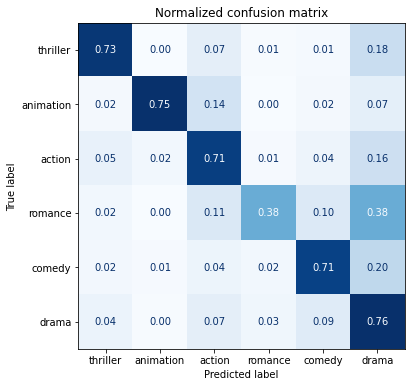

In [48]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [49]:
print(classification_report(y_valid,y_preds, target_names=labels))

              precision    recall  f1-score   support

    thriller       0.72      0.73      0.73       192
   animation       0.77      0.75      0.76        57
      action       0.73      0.71      0.72       346
     romance       0.54      0.38      0.45        89
      comedy       0.79      0.71      0.75       416
       drama       0.67      0.76      0.71       558

    accuracy                           0.71      1658
   macro avg       0.70      0.67      0.69      1658
weighted avg       0.71      0.71      0.71      1658



In [61]:
df_train[df_train["text"].str.contains("Jane Foster")]

,title,text,label_name,label
12603,thor,"In 965 AD, Odin, king of Asgard, wages war aga...",action,2
12961,thor: the dark world,"Eons ago, Bor, father of Odin, clashes with th...",action,2


# Inference

In [51]:
text = "Thor enlists the help of Valkyrie, Korg and ex-girlfriend Jane Foster to fight Gorr the God Butcher, who intends to make the gods extinct."

encoding = tokenizer(text,  padding=True, truncation=True, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [52]:
logits = outputs.logits
logits.shape

torch.Size([1, 6])

In [53]:
predictions = torch.nn.functional.softmax(logits.squeeze().cpu(), dim=-1)
predictions

tensor([0.0344, 0.0048, 0.9169, 0.0028, 0.0301, 0.0111],
       grad_fn=<SoftmaxBackward0>)

In [54]:
id2label[int(predictions.argmax())]

'action'